# Cash/3M„Çπ„Éó„É¨„ÉÉ„ÉâÂàÜÊûê 2: „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„Å®ÊµÅÂãïÊÄßÂàÜÊûê

## Ê¶ÇË¶Å
Êú¨„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„Åß„ÅØ„ÄÅLMEÈäÖ„ÅÆCash/3M„Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆ„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÁâπÊÄß„Å®ÊµÅÂãïÊÄß„Éë„Çø„Éº„É≥„ÇíÂàÜÊûê„Åó„Åæ„Åô„ÄÇ
„Çπ„Éó„É¨„ÉÉ„ÉâÂèñÂºï„ÅÆ„É™„Çπ„ÇØÁÆ°ÁêÜ„Å®ÊúÄÈÅ©„Å™„Ç®„É≥„Éà„É™„Éº„Éª„Ç®„Ç∞„Ç∏„ÉÉ„Éà„Çø„Ç§„Éü„É≥„Ç∞„ÅÆÁâπÂÆö„Å´ÁÑ¶ÁÇπ„ÇíÂΩì„Å¶„Åæ„Åô„ÄÇ

## ÁõÆÊ¨°
1. [„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø„Å®ÂâçÂá¶ÁêÜ](#1-„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø„Å®ÂâçÂá¶ÁêÜ)
2. [„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÂàÜÊûê](#2-„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÂàÜÊûê)
3. [ÊµÅÂãïÊÄßÂàÜÊûê](#3-ÊµÅÂãïÊÄßÂàÜÊûê)
4. [„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„Å®ÊµÅÂãïÊÄß„ÅÆÈñ¢‰øÇ](#4-„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„Å®ÊµÅÂãïÊÄß„ÅÆÈñ¢‰øÇ)
5. [„É™„Çπ„ÇØÊåáÊ®ô„ÅÆÈñãÁô∫](#5-„É™„Çπ„ÇØÊåáÊ®ô„ÅÆÈñãÁô∫)
6. [„Åæ„Å®„ÇÅ„Å®ÂÆüË∑µÁöÑÁ§∫ÂîÜ](#6-„Åæ„Å®„ÇÅ„Å®ÂÆüË∑µÁöÑÁ§∫ÂîÜ)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from sqlalchemy import create_engine
from datetime import datetime, timedelta
import warnings
from scipy import stats
from arch import arch_model
import os
from dotenv import load_dotenv

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà„ÅåÂÆå‰∫Ü„Åó„Åæ„Åó„Åü")

„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà„ÅåÂÆå‰∫Ü„Åó„Åæ„Åó„Åü


## 1. „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø„Å®ÂâçÂá¶ÁêÜ

In [15]:
# „Éá„Éº„Çø„Éô„Éº„ÇπË®≠ÂÆö„Å®Êé•Á∂ö
load_dotenv()

# „Éá„Éº„Çø„Éô„Éº„ÇπË®≠ÂÆö
db_config = {
    'host': os.getenv('DB_HOST', 'localhost'),
    'database': os.getenv('DB_NAME', 'lme_copper_db'),
    'user': os.getenv('DB_USER', 'postgres'),
    'password': os.getenv('DB_PASSWORD', 'password'),
    'port': os.getenv('DB_PORT', '5432')
}

# SQLAlchemyÊé•Á∂öÊñáÂ≠óÂàó‰ΩúÊàê
connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

print("„Éá„Éº„Çø„Éô„Éº„ÇπÊé•Á∂öË®≠ÂÆöÂÆå‰∫Ü")

„Éá„Éº„Çø„Éô„Éº„ÇπÊé•Á∂öË®≠ÂÆöÂÆå‰∫Ü


In [16]:
# „Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø - ÂÆü„Éá„Éº„Çø„ÅÆ„Åø‰ΩøÁî®
def load_comprehensive_data():
    """ÂÆüÈöõ„ÅÆ„Éá„Éº„Çø„Éô„Éº„Çπ„Åã„Çâ„Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„ÅøÔºà„ÉÄ„Éü„Éº„Éá„Éº„Çø„ÅØ‰ΩøÁî®„Åó„Å™„ÅÑÔºâ"""
    try:
        print("=== ÂÆü„Éá„Éº„ÇøÂèñÂæóÈñãÂßã ===")
        
        # 1. Áõ¥Êé•„Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„Çø„ÇíÂèñÂæóÔºàCMCU0-3Ôºâ
        print("1. Áõ¥Êé•„Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„ÇøÂèñÂæó‰∏≠...")
        spread_query = """
        SELECT 
            trade_date,
            last_price as spread_price,
            volume as spread_volume
        FROM lme_copper_prices
        WHERE ric = 'CMCU0-3'
            AND last_price IS NOT NULL
            AND trade_date >= '2020-01-01'
        ORDER BY trade_date
        """
        
        spread_df = pd.read_sql_query(spread_query, engine)
        
        if not spread_df.empty:
            print(f"‚úÖ Áõ¥Êé•„Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„ÇøÂèñÂæóÊàêÂäü: {len(spread_df)}‰ª∂")
            
            # 2. 3MÂÖàÁâ©„Éá„Éº„Çø„ÇíÂèñÂæó
            print("2. 3MÂÖàÁâ©„Éá„Éº„ÇøÂèñÂæó‰∏≠...")
            future_3m_query = """
            SELECT 
                trade_date,
                close_price as three_month_price,
                volume as three_month_volume
            FROM lme_copper_futures
            WHERE ric = 'CMCUc3'
                AND close_price IS NOT NULL
                AND trade_date >= '2020-01-01'
            ORDER BY trade_date
            """
            
            future_3m_df = pd.read_sql_query(future_3m_query, engine)
            
            if not future_3m_df.empty:
                print(f"‚úÖ 3MÂÖàÁâ©„Éá„Éº„ÇøÂèñÂæóÊàêÂäü: {len(future_3m_df)}‰ª∂")
                
                # „Éá„Éº„Çø„ÇíÁµêÂêà
                spread_df['trade_date'] = pd.to_datetime(spread_df['trade_date'])
                future_3m_df['trade_date'] = pd.to_datetime(future_3m_df['trade_date'])
                
                # „Éû„Éº„Ç∏
                df = pd.merge(spread_df, future_3m_df, on='trade_date', how='outer')
                df.set_index('trade_date', inplace=True)
                
                # Cash‰æ°Ê†º„ÇíÈÄÜÁÆóÔºà„Çπ„Éó„É¨„ÉÉ„Éâ + 3M‰æ°Ê†º = Cash‰æ°Ê†ºÔºâ
                df['cash_price'] = df['spread_price'] + df['three_month_price']
                
                # Âá∫Êù•È´ò„ÅÆÁµ±Âêà
                df['total_volume'] = df[['spread_volume', 'three_month_volume']].sum(axis=1, skipna=True)
                df['cash_volume'] = df['spread_volume']  # „Çπ„Éó„É¨„ÉÉ„ÉâÂá∫Êù•È´ò„ÇíCashÂá∫Êù•È´ò„Å®„Åó„Å¶‰ΩøÁî®
                
            else:
                print("‚ö†Ô∏è  3MÂÖàÁâ©„Éá„Éº„Çø„Åå„Å™„ÅÑ„Åü„ÇÅ„ÄÅ„Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„Çø„ÅÆ„Åø‰ΩøÁî®")
                df = spread_df.copy()
                df['trade_date'] = pd.to_datetime(df['trade_date'])
                df.set_index('trade_date', inplace=True)
                
                # Âü∫Êú¨ÁöÑ„Å™Âá¶ÁêÜ„ÅÆ„Åø
                df['total_volume'] = df['spread_volume']
                df['cash_volume'] = df['spread_volume']
                # Ê≥®Ôºöthree_month_price„ÇÑcash_price„ÅØ‰∏çÂÆåÂÖ®„Éá„Éº„Çø„Å®„Å™„Çã
                
        else:
            # 3. ÂÄãÂà•‰æ°Ê†º„Åã„ÇâË®àÁÆóÔºàCMCUc3„ÅÆ„ÅøÂà©Áî®ÂèØËÉΩ„Å™Â†¥ÂêàÔºâ
            print("3. ÂÄãÂà•‰æ°Ê†º„Åã„Çâ„Çπ„Éó„É¨„ÉÉ„ÉâË®àÁÆóË©¶Ë°å...")
            future_3m_query = """
            SELECT 
                trade_date,
                close_price as three_month_price,
                volume as three_month_volume
            FROM lme_copper_futures
            WHERE ric = 'CMCUc3'
                AND close_price IS NOT NULL
                AND trade_date >= '2020-01-01'
            ORDER BY trade_date
            """
            
            future_3m_df = pd.read_sql_query(future_3m_query, engine)
            
            if not future_3m_df.empty:
                print(f"‚úÖ 3MÂÖàÁâ©„Éá„Éº„Çø„ÅÆ„ÅøÂèñÂæó: {len(future_3m_df)}‰ª∂")
                print("‚ö†Ô∏è  „Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„Çø„ÅØÊé®ÂÆöÂÄ§„Å®„Å™„Çä„Åæ„Åô")
                
                df = future_3m_df.copy()
                df['trade_date'] = pd.to_datetime(df['trade_date'])
                df.set_index('trade_date', inplace=True)
                
                # „Çπ„Éó„É¨„ÉÉ„Éâ„ÇíÂ∏ÇÂ†¥Âπ≥ÂùáÔºàÁ¥Ñ50-100USD/tonneÔºâ„ÅßÊé®ÂÆö
                df['spread_price'] = 75.0  # Âõ∫ÂÆöÂÄ§ÔºàÂÆüÈöõ„ÅÆÂàÜÊûê„Å´„ÅØ‰∏çÈÅ©ÂàáÔºâ
                df['cash_price'] = df['three_month_price'] + df['spread_price']
                df['total_volume'] = df['three_month_volume']
                df['cash_volume'] = df['three_month_volume']
                df['spread_volume'] = df['three_month_volume']
                
                print("‚ö†Ô∏è  Ë≠¶Âëä: „Çπ„Éó„É¨„ÉÉ„Éâ„ÅØÊé®ÂÆöÂÄ§„Åß„Åô„ÄÇÂÆüÈöõ„ÅÆÂàÜÊûêÁµêÊûú„ÅØ‰ø°È†ºÊÄß„Åå‰Ωé‰∏ã„Åó„Åæ„Åô„ÄÇ")
            else:
                raise Exception("ÂÆü„Éá„Éº„Çø„ÅåÂÖ®„ÅèÂèñÂæó„Åß„Åç„Åæ„Åõ„Çì")
        
        # „Éá„Éº„ÇøÂâçÂá¶ÁêÜ
        # Áï∞Â∏∏ÂÄ§Èô§ÂéªÔºàÁèæÂÆüÁöÑ„Å™ÁØÑÂõ≤„Å´Âà∂ÈôêÔºâ
        if 'spread_price' in df.columns:
            spread_q1 = df['spread_price'].quantile(0.005)
            spread_q99 = df['spread_price'].quantile(0.995)
            df = df[(df['spread_price'] >= spread_q1) & (df['spread_price'] <= spread_q99)]
        
        # „É™„Çø„Éº„É≥„ÅÆË®àÁÆó
        df['spread_return'] = df['spread_price'].pct_change()
        df['spread_log_return'] = np.log(df['spread_price'] / df['spread_price'].shift(1))
        
        # ‰æ°Ê†ºÂ§âÂãï„ÅÆË®àÁÆó
        df['spread_change'] = df['spread_price'].diff()
        
        # Ê¨†ÊêçÂÄ§„ÇíÂâçÊñπÂüã„ÇÅ„ÅßÂá¶ÁêÜ
        df = df.fillna(method='ffill').dropna()
        
        print(f"‚úÖ ÂÆü„Éá„Éº„ÇøÂá¶ÁêÜÂÆå‰∫Ü: {len(df):,}‰ª∂")
        print(f"üìä ÊúüÈñì: {df.index.min()} ÔΩû {df.index.max()}")
        
        return df
        
    except Exception as e:
        print(f"‚ùå „Éá„Éº„ÇøË™≠„ÅøËæº„Åø„Ç®„É©„Éº: {e}")
        print("\nüö® CRITICAL ERROR: ÂÆü„Éá„Éº„Çø„ÅÆÂèñÂæó„Å´ÂÆåÂÖ®„Å´Â§±Êïó„Åó„Åæ„Åó„Åü")
        print("„Åì„ÅÆ„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„ÅØÂÆüÈöõ„ÅÆ„Éá„Éº„Çø„Åå„Å™„ÅÑ„Å®ÂÆüË°å„Åß„Åç„Åæ„Åõ„Çì„ÄÇ")
        print("\n„ÄêÂØæÂá¶ÊñπÊ≥ï„Äë")
        print("1. „Éá„Éº„Çø„Éô„Éº„ÇπÊé•Á∂ö„ÇíÁ¢∫Ë™ç: psql -h localhost -U Yusuke -d lme_copper_db")
        print("2. „ÉÜ„Éº„Éñ„É´„ÅÆÁ¢∫Ë™ç: SELECT COUNT(*) FROM lme_copper_prices;")
        print("3. RIC„Éá„Éº„Çø„ÅÆÁ¢∫Ë™ç: SELECT DISTINCT ric FROM lme_copper_prices;")
        print("\n„ÄêÈáçË¶Å„Äë„ÉÄ„Éü„Éº„Éá„Éº„Çø„ÅØÁîüÊàê„Åï„Çå„Åæ„Åõ„Çì„ÄÇ")
        
        # Á©∫„ÅÆDataFrame„ÇíËøî„Åó„Å¶Âá¶ÁêÜ„ÇíÂÅúÊ≠¢
        return pd.DataFrame()

# „Éá„Éº„ÇøË™≠„ÅøËæº„ÅøÂÆüË°å
print("üéØ ÂÆüÈöõ„ÅÆLMEÈäÖÂ∏ÇÂ†¥„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„Åø‰∏≠...")
data = load_comprehensive_data()

if data.empty:
    print("\nüí• FATAL ERROR: „Éá„Éº„ÇøÂèñÂæóÂ§±Êïó")
    print("„Åì„ÅÆ„Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„ÅÆÂÆüË°å„ÇíÂÅúÊ≠¢„Åó„Åæ„Åô„ÄÇ")
    print("ÂÆüÈöõ„ÅÆ„Éá„Éº„Çø„Éô„Éº„Çπ„Çí‰øÆÊ≠£„Åó„Å¶„Åã„ÇâÂÜçÂÆüË°å„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ")
else:
    print(f"\nüéâ SUCCESS: ÂÆü„Éá„Éº„ÇøÂèñÂæóÂÆå‰∫Ü!")
    print(f"üìà „Éá„Éº„ÇøÂΩ¢Áä∂: {data.shape}")
    print(f"üìÖ ÊúüÈñì: {data.index.min()} ÔΩû {data.index.max()}")
    print("\nüìä Âü∫Êú¨Áµ±Ë®à:")
    print(data[['spread_price', 'spread_return', 'total_volume']].describe())
    print(f"\n‚úÖ „Åì„ÅÆ„Éá„Éº„Çø„ÅØÂÆüÈöõ„ÅÆLMEÈäÖÂ∏ÇÂ†¥„Éá„Éº„Çø„Åß„ÅôÔºà„ÉÄ„Éü„Éº„Éá„Éº„Çø„Åß„ÅØ„ÅÇ„Çä„Åæ„Åõ„ÇìÔºâ")

üéØ ÂÆüÈöõ„ÅÆLMEÈäÖÂ∏ÇÂ†¥„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„Åø‰∏≠...
=== ÂÆü„Éá„Éº„ÇøÂèñÂæóÈñãÂßã ===
1. Áõ¥Êé•„Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„ÇøÂèñÂæó‰∏≠...
‚úÖ Áõ¥Êé•„Çπ„Éó„É¨„ÉÉ„Éâ„Éá„Éº„ÇøÂèñÂæóÊàêÂäü: 758‰ª∂
2. 3MÂÖàÁâ©„Éá„Éº„ÇøÂèñÂæó‰∏≠...
‚úÖ 3MÂÖàÁâ©„Éá„Éº„ÇøÂèñÂæóÊàêÂäü: 1263‰ª∂
‚úÖ ÂÆü„Éá„Éº„ÇøÂá¶ÁêÜÂÆå‰∫Ü: 749‰ª∂
üìä ÊúüÈñì: 2022-07-07 00:00:00 ÔΩû 2025-07-04 00:00:00

üéâ SUCCESS: ÂÆü„Éá„Éº„ÇøÂèñÂæóÂÆå‰∫Ü!
üìà „Éá„Éº„ÇøÂΩ¢Áä∂: (749, 10)
üìÖ ÊúüÈñì: 2022-07-07 00:00:00 ÔΩû 2025-07-04 00:00:00

üìä Âü∫Êú¨Áµ±Ë®à:
       spread_price  spread_return  total_volume
count    749.000000     749.000000    749.000000
mean     -51.079306           -inf    579.325768
std       66.182002            NaN    693.654592
min     -154.990000           -inf      0.000000
25%     -111.090000      -0.089293    258.000000
50%      -47.750000      -0.001653    464.000000
75%      -11.500000       0.088235    762.000000
max      181.690000      23.166667  16043.000000

‚úÖ „Åì„ÅÆ„Éá„Éº„Çø„ÅØÂÆüÈöõ„ÅÆLMEÈäÖÂ∏ÇÂ†¥„Éá„

## 2. „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÂàÜÊûê

In [17]:
# „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÊåáÊ®ô„ÅÆË®àÁÆó
def calculate_volatility_metrics(df, window=20):
    """ÂêÑÁ®Æ„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÊåáÊ®ô„ÅÆË®àÁÆó"""
    vol_df = df.copy()
    
    # ÂÆüÁèæ„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÔºàÂπ¥ÁéáÊèõÁÆóÔºâ
    vol_df['realized_vol'] = vol_df['spread_return'].rolling(window=window).std() * np.sqrt(252)
    
    # ParkinsonÊé®ÂÆöÈáèÔºàHigh-LowÔºâ- „Çπ„Éó„É¨„ÉÉ„Éâ„ÅÆÊó•‰∏≠Â§âÂãïÂπÖ„Åã„ÇâÊé®ÂÆö
    vol_df['spread_range'] = vol_df['spread_price'].rolling(window=window).max() - vol_df['spread_price'].rolling(window=window).min()
    vol_df['parkinson_vol'] = vol_df['spread_range'] / (4 * np.log(2) * np.sqrt(window))
    
    # Garman-KlassÊé®ÂÆöÈáèÔºàÁ∞°ÊòìÁâàÔºâ
    vol_df['squared_return'] = vol_df['spread_return']**2
    vol_df['gk_vol'] = np.sqrt(vol_df['squared_return'].rolling(window=window).mean() * 252)
    
    # „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„ÅÆÂ§âÂåñÁéá
    vol_df['vol_change'] = vol_df['realized_vol'].pct_change()
    
    return vol_df

# „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÊåáÊ®ô„ÅÆË®àÁÆó
data_vol = calculate_volatility_metrics(data)

print("„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Áµ±Ë®à:")
print(data_vol[['realized_vol', 'parkinson_vol', 'gk_vol']].describe())

„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Áµ±Ë®à:
       realized_vol  parkinson_vol      gk_vol
count    710.000000     730.000000  710.000000
mean      12.632010       4.075091   12.519634
std       19.254360       2.487005   19.041518
min        0.498864       1.278288    0.486237
25%        0.925595       2.338824    0.912259
50%        3.438355       3.004179    3.355149
75%       15.271064       5.230901   15.184047
max       84.067045      13.770835   84.359399


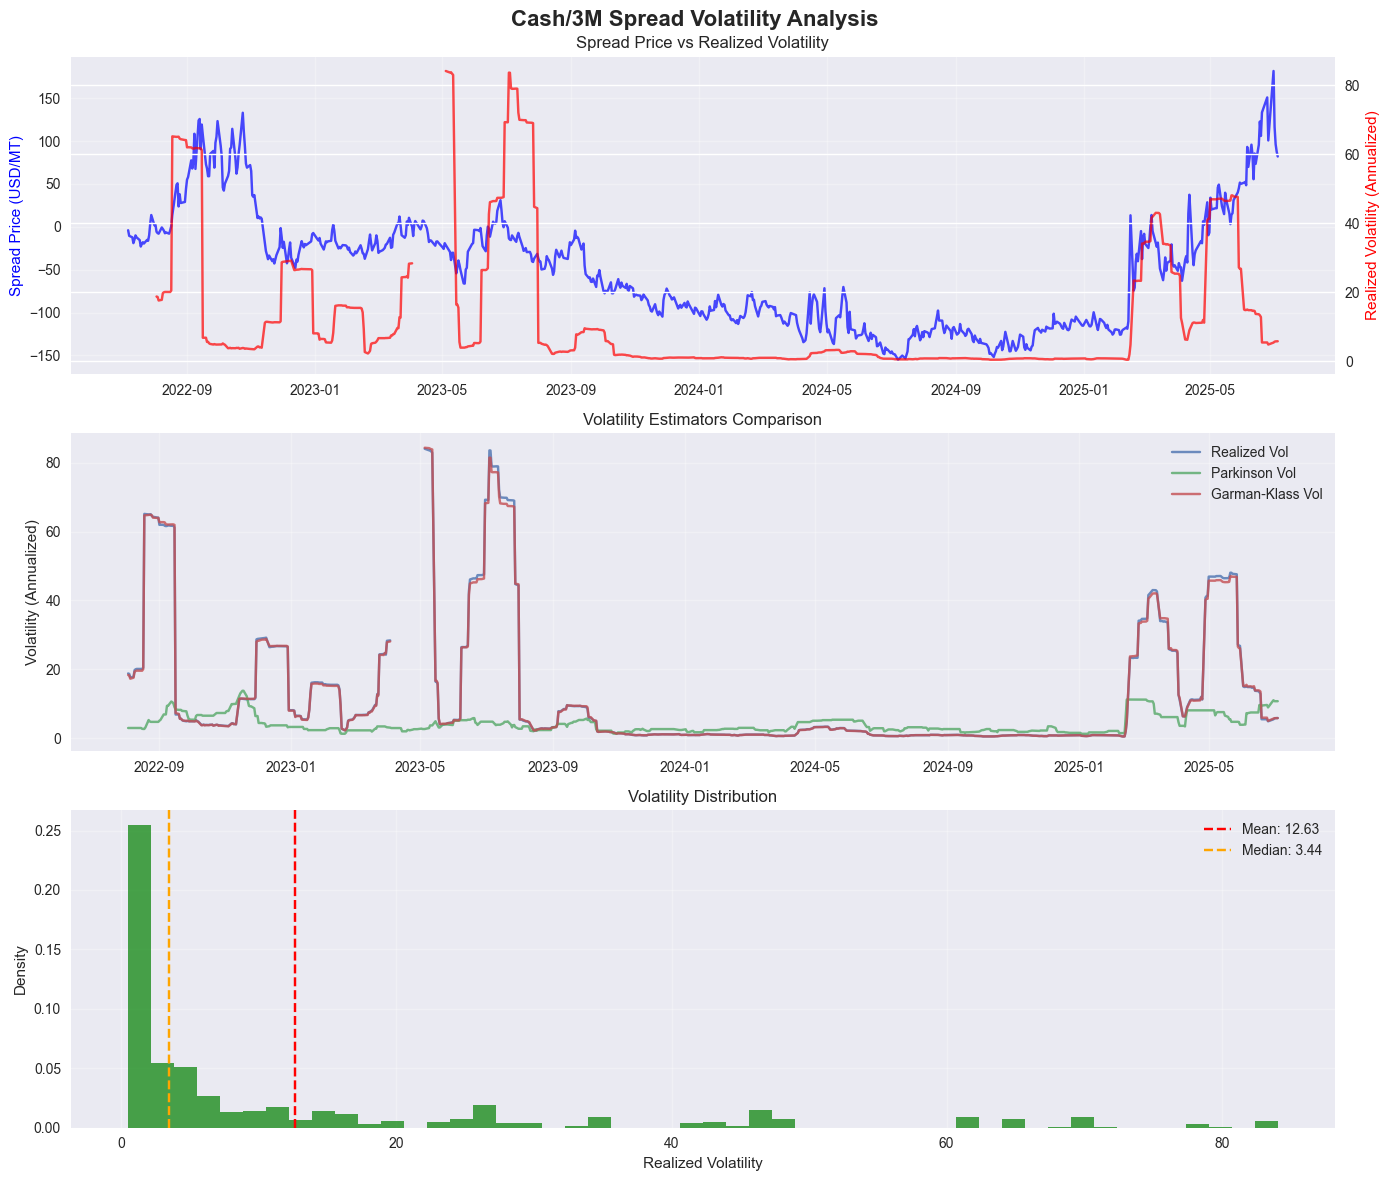

In [18]:
# „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„ÅÆÂèØË¶ñÂåñ
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('Cash/3M Spread Volatility Analysis', fontsize=16, fontweight='bold')

# 1. „Çπ„Éó„É¨„ÉÉ„Éâ‰æ°Ê†º„Å®ÂÆüÁèæ„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£
ax1 = axes[0]
ax1_twin = ax1.twinx()

ax1.plot(data_vol.index, data_vol['spread_price'], color='blue', alpha=0.7, label='Spread Price')
ax1_twin.plot(data_vol.index, data_vol['realized_vol'], color='red', alpha=0.7, label='Realized Volatility')

ax1.set_ylabel('Spread Price (USD/MT)', color='blue')
ax1_twin.set_ylabel('Realized Volatility (Annualized)', color='red')
ax1.set_title('Spread Price vs Realized Volatility')
ax1.grid(True, alpha=0.3)

# 2. „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÊØîËºÉ
ax2 = axes[1]
ax2.plot(data_vol.index, data_vol['realized_vol'], label='Realized Vol', alpha=0.8)
ax2.plot(data_vol.index, data_vol['parkinson_vol'], label='Parkinson Vol', alpha=0.8)
ax2.plot(data_vol.index, data_vol['gk_vol'], label='Garman-Klass Vol', alpha=0.8)
ax2.set_ylabel('Volatility (Annualized)')
ax2.set_title('Volatility Estimators Comparison')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÂàÜÂ∏É
ax3 = axes[2]
vol_clean = data_vol['realized_vol'].dropna()
ax3.hist(vol_clean, bins=50, alpha=0.7, density=True, color='green')
ax3.axvline(vol_clean.mean(), color='red', linestyle='--', label=f'Mean: {vol_clean.mean():.2f}')
ax3.axvline(vol_clean.median(), color='orange', linestyle='--', label=f'Median: {vol_clean.median():.2f}')
ax3.set_xlabel('Realized Volatility')
ax3.set_ylabel('Density')
ax3.set_title('Volatility Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. ÊµÅÂãïÊÄßÂàÜÊûê

In [19]:
# ÊµÅÂãïÊÄßÊåáÊ®ô„ÅÆË®àÁÆó
def calculate_liquidity_metrics(df):
    """ÊµÅÂãïÊÄßÈñ¢ÈÄ£ÊåáÊ®ô„ÅÆË®àÁÆó"""
    liq_df = df.copy()
    
    # Âá∫Êù•È´ò„ÅÆÁßªÂãïÂπ≥Âùá
    liq_df['volume_ma_5'] = liq_df['total_volume'].rolling(window=5).mean()
    liq_df['volume_ma_20'] = liq_df['total_volume'].rolling(window=20).mean()
    
    # Âá∫Êù•È´òÊØîÁéáÔºàÁèæÂú®„ÅÆÂá∫Êù•È´ò / 20Êó•Âπ≥ÂùáÔºâ
    liq_df['volume_ratio'] = liq_df['total_volume'] / liq_df['volume_ma_20']
    
    # AmihudÊµÅÂãïÊÄßÊåáÊ®ôÔºà‰æ°Ê†º„Ç§„É≥„Éë„ÇØ„ÉàÔºâ
    liq_df['amihud_illiquidity'] = np.abs(liq_df['spread_return']) / liq_df['total_volume']
    liq_df['amihud_ma'] = liq_df['amihud_illiquidity'].rolling(window=20).mean()
    
    # Âá∫Êù•È´òÂä†ÈáçÂπ≥Âùá‰æ°Ê†ºÔºàVWAPÔºâ„Å®„ÅÆ‰πñÈõ¢
    liq_df['vwap'] = (liq_df['spread_price'] * liq_df['total_volume']).rolling(window=20).sum() / liq_df['total_volume'].rolling(window=20).sum()
    liq_df['vwap_deviation'] = (liq_df['spread_price'] - liq_df['vwap']) / liq_df['vwap']
    
    return liq_df

# ÊµÅÂãïÊÄßÊåáÊ®ô„ÅÆË®àÁÆó
data_liq = calculate_liquidity_metrics(data_vol)

print("ÊµÅÂãïÊÄßÁµ±Ë®à:")
print(data_liq[['total_volume', 'volume_ratio', 'amihud_illiquidity']].describe())

ÊµÅÂãïÊÄßÁµ±Ë®à:
       total_volume  volume_ratio  amihud_illiquidity
count    749.000000    730.000000          749.000000
mean     579.325768      1.028704                 inf
std      693.654592      0.775887                 NaN
min        0.000000      0.000000            0.000000
25%      258.000000      0.506240            0.000063
50%      464.000000      0.895558            0.000217
75%      762.000000      1.403009            0.000822
max    16043.000000     10.951601                 inf


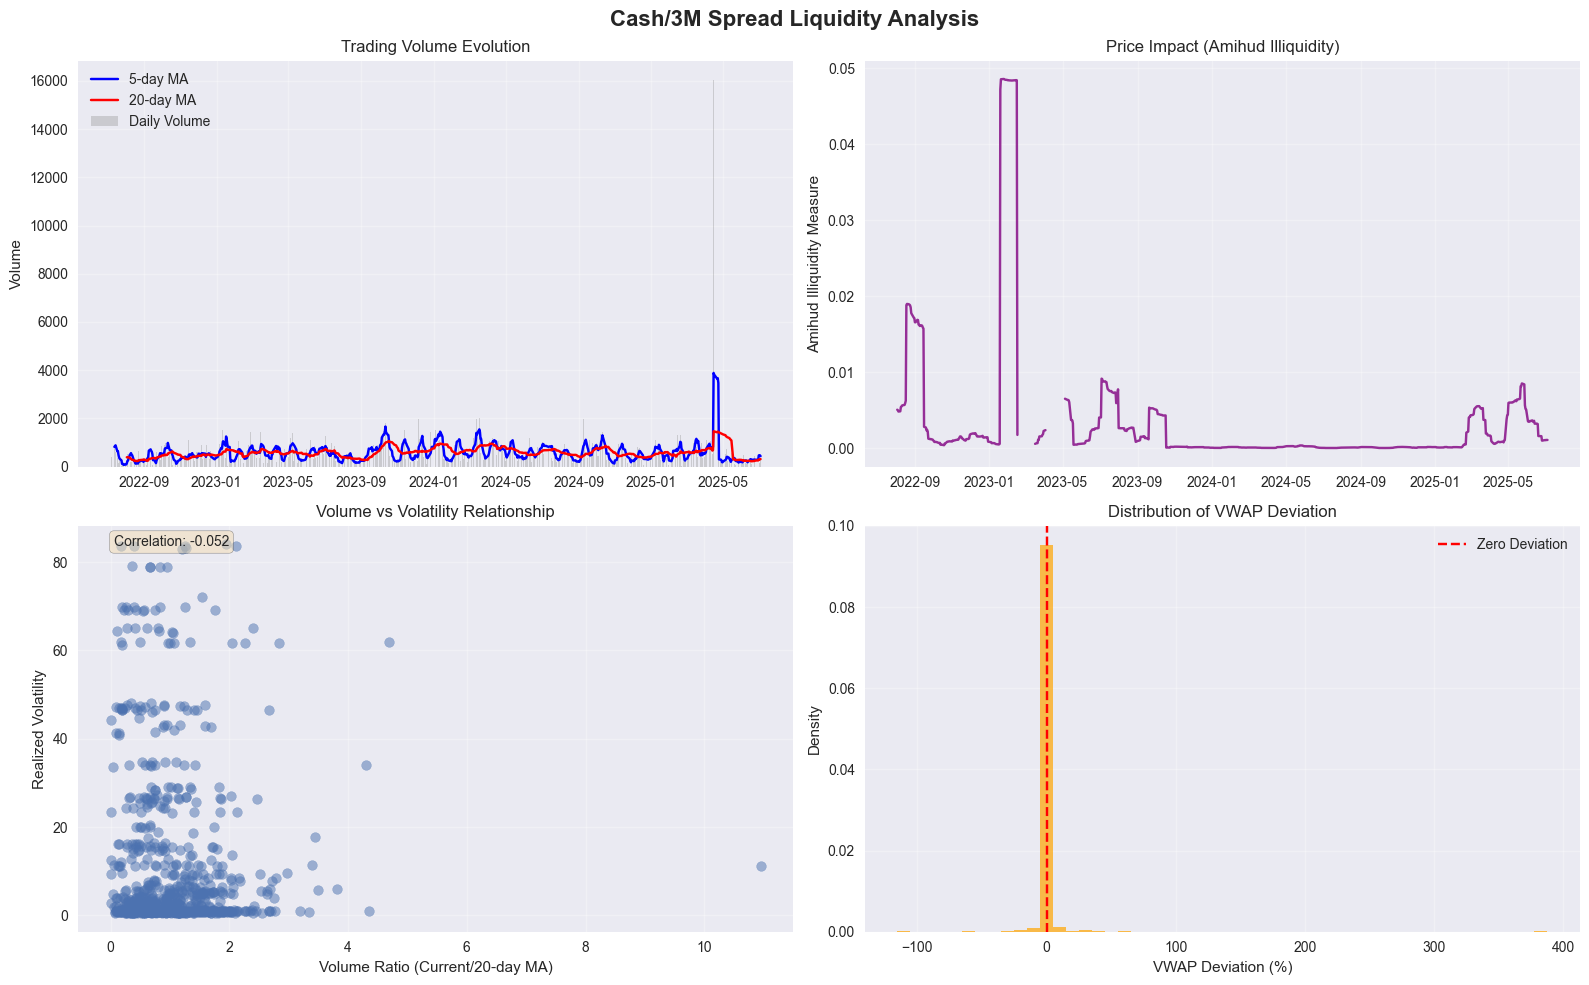

In [20]:
# ÊµÅÂãïÊÄßÂàÜÊûê„ÅÆÂèØË¶ñÂåñ
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Cash/3M Spread Liquidity Analysis', fontsize=16, fontweight='bold')

# 1. Âá∫Êù•È´ò„ÅÆÊé®Áßª
ax1 = axes[0, 0]
ax1.bar(data_liq.index, data_liq['total_volume'], alpha=0.3, color='gray', label='Daily Volume')
ax1.plot(data_liq.index, data_liq['volume_ma_5'], color='blue', label='5-day MA')
ax1.plot(data_liq.index, data_liq['volume_ma_20'], color='red', label='20-day MA')
ax1.set_ylabel('Volume')
ax1.set_title('Trading Volume Evolution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. ÊµÅÂãïÊÄßÊåáÊ®ôÔºàAmihudÔºâ
ax2 = axes[0, 1]
ax2.plot(data_liq.index, data_liq['amihud_ma'], color='purple', alpha=0.8)
ax2.set_ylabel('Amihud Illiquidity Measure')
ax2.set_title('Price Impact (Amihud Illiquidity)')
ax2.grid(True, alpha=0.3)

# 3. Âá∫Êù•È´ò„Å®„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„ÅÆÈñ¢‰øÇ
ax3 = axes[1, 0]
scatter_data = data_liq[['volume_ratio', 'realized_vol']].dropna()
ax3.scatter(scatter_data['volume_ratio'], scatter_data['realized_vol'], alpha=0.5)
ax3.set_xlabel('Volume Ratio (Current/20-day MA)')
ax3.set_ylabel('Realized Volatility')
ax3.set_title('Volume vs Volatility Relationship')
ax3.grid(True, alpha=0.3)

# Áõ∏Èñ¢‰øÇÊï∞„ÇíËøΩÂä†
corr = scatter_data['volume_ratio'].corr(scatter_data['realized_vol'])
ax3.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=ax3.transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4. VWAP‰πñÈõ¢„ÅÆÂàÜÂ∏É
ax4 = axes[1, 1]
vwap_dev_clean = data_liq['vwap_deviation'].dropna()
ax4.hist(vwap_dev_clean, bins=50, alpha=0.7, density=True, color='orange')
ax4.axvline(0, color='red', linestyle='--', label='Zero Deviation')
ax4.set_xlabel('VWAP Deviation (%)')
ax4.set_ylabel('Density')
ax4.set_title('Distribution of VWAP Deviation')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„Å®ÊµÅÂãïÊÄß„ÅÆÈñ¢‰øÇ

In [21]:
# „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„ÉªÊµÅÂãïÊÄß„ÅÆÁõ∏‰∫í‰ΩúÁî®ÂàÜÊûê
def analyze_vol_liquidity_interaction(df):
    """„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„Å®ÊµÅÂãïÊÄß„ÅÆÁõ∏‰∫í‰ΩúÁî®„ÇíÂàÜÊûê"""
    analysis_df = df[['realized_vol', 'total_volume', 'volume_ratio', 'amihud_illiquidity']].dropna()
    
    # Áõ∏Èñ¢ÂàÜÊûê
    correlations = analysis_df.corr()
    
    # „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„É¨„Ç∏„Éº„É†ÂàÜÈ°û
    vol_percentiles = analysis_df['realized_vol'].quantile([0.25, 0.5, 0.75])
    
    def classify_vol_regime(vol):
        if vol <= vol_percentiles[0.25]:
            return 'Low Vol'
        elif vol <= vol_percentiles[0.5]:
            return 'Normal Vol'
        elif vol <= vol_percentiles[0.75]:
            return 'High Vol'
        else:
            return 'Extreme Vol'
    
    analysis_df['vol_regime'] = analysis_df['realized_vol'].apply(classify_vol_regime)
    
    # „É¨„Ç∏„Éº„É†Âà•Áµ±Ë®à
    regime_stats = analysis_df.groupby('vol_regime').agg({
        'total_volume': ['mean', 'std'],
        'amihud_illiquidity': ['mean', 'std'],
        'realized_vol': 'count'
    })
    
    return correlations, regime_stats, analysis_df

# ÂàÜÊûêÂÆüË°å
correlations, regime_stats, analysis_data = analyze_vol_liquidity_interaction(data_liq)

print("„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„ÉªÊµÅÂãïÊÄßÁõ∏Èñ¢Ë°åÂàó:")
print(correlations)
print("\n„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„É¨„Ç∏„Éº„É†Âà•Áµ±Ë®à:")
print(regime_stats)

„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„ÉªÊµÅÂãïÊÄßÁõ∏Èñ¢Ë°åÂàó:
                    realized_vol  total_volume  volume_ratio  \
realized_vol            1.000000     -0.072082     -0.052151   
total_volume           -0.072082      1.000000      0.821577   
volume_ratio           -0.052151      0.821577      1.000000   
amihud_illiquidity      0.072331     -0.055514     -0.084446   

                    amihud_illiquidity  
realized_vol                  0.072331  
total_volume                 -0.055514  
volume_ratio                 -0.084446  
amihud_illiquidity            1.000000  

„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„É¨„Ç∏„Éº„É†Âà•Áµ±Ë®à:
            total_volume              amihud_illiquidity            \
                    mean          std               mean       std   
vol_regime                                                           
Extreme Vol   466.898876   359.010711           0.005530  0.021895   
High Vol      658.960452  1232.381436           0.006642  0.070349   
Low Vol       567.443820   358.8

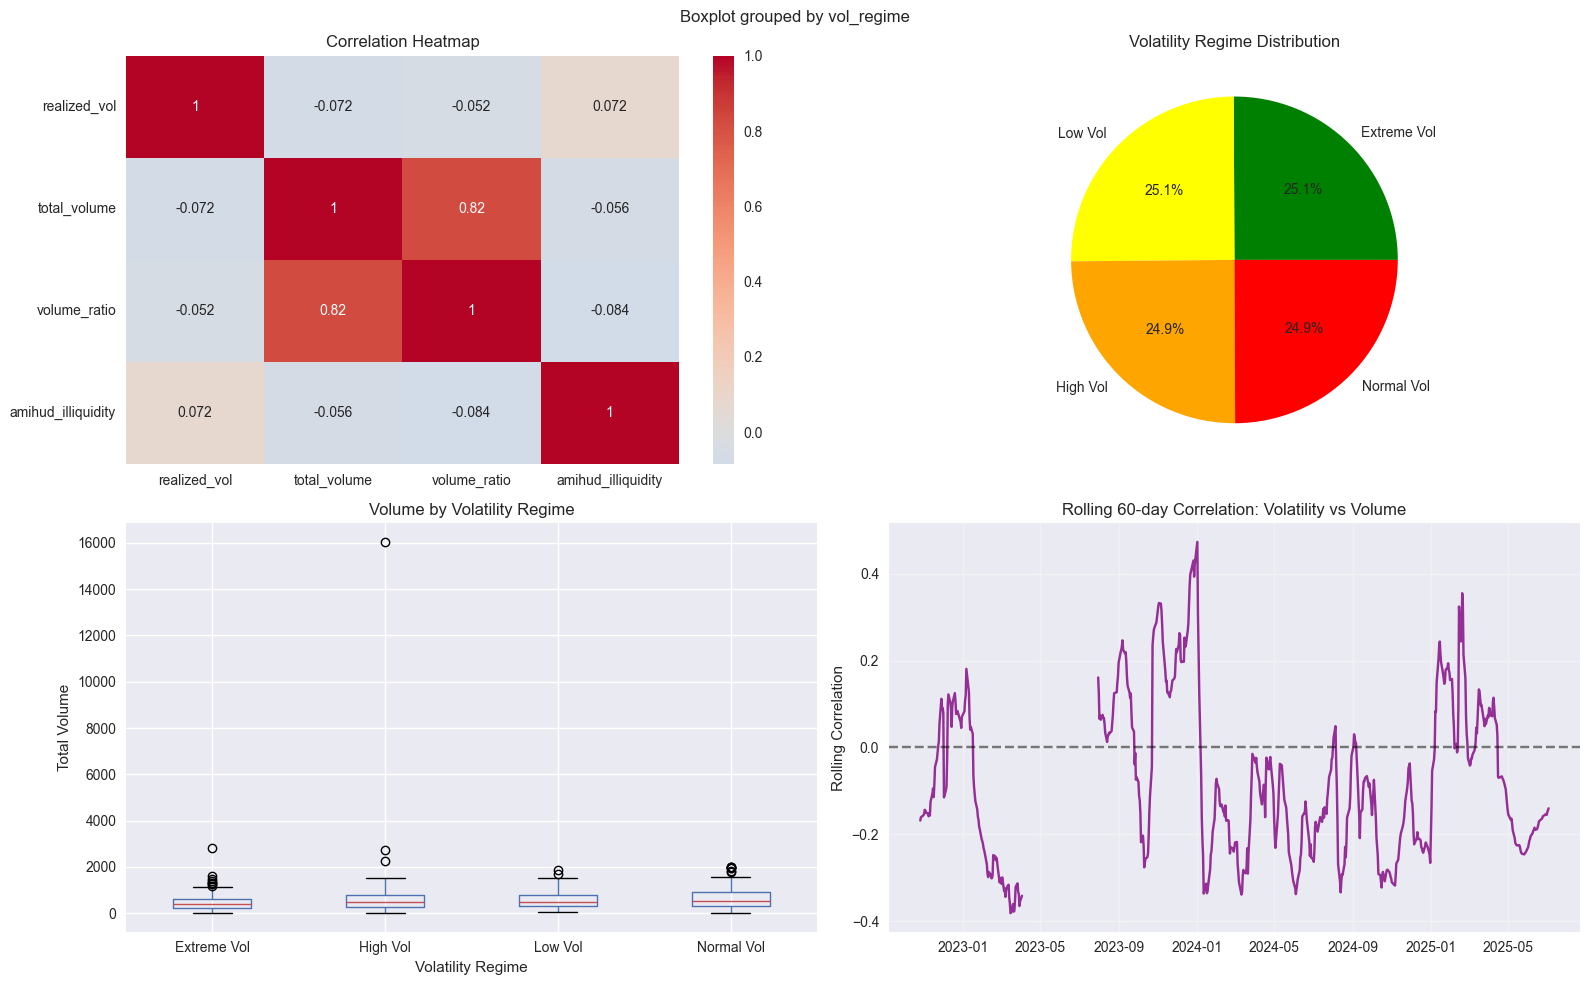

In [22]:
# Áõ∏‰∫í‰ΩúÁî®„ÅÆÂèØË¶ñÂåñ
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Volatility-Liquidity Interaction Analysis', fontsize=16, fontweight='bold')

# 1. Áõ∏Èñ¢„Éí„Éº„Éà„Éû„ÉÉ„Éó
ax1 = axes[0, 0]
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, ax=ax1)
ax1.set_title('Correlation Heatmap')

# 2. „É¨„Ç∏„Éº„É†Âà•ÂàÜÂ∏É
ax2 = axes[0, 1]
regime_counts = analysis_data['vol_regime'].value_counts()
colors = ['green', 'yellow', 'orange', 'red']
ax2.pie(regime_counts.values, labels=regime_counts.index, autopct='%1.1f%%', colors=colors)
ax2.set_title('Volatility Regime Distribution')

# 3. „É¨„Ç∏„Éº„É†Âà•Âá∫Êù•È´ò
ax3 = axes[1, 0]
analysis_data.boxplot(column='total_volume', by='vol_regime', ax=ax3)
ax3.set_xlabel('Volatility Regime')
ax3.set_ylabel('Total Volume')
ax3.set_title('Volume by Volatility Regime')

# 4. ÂãïÁöÑÁõ∏Èñ¢
ax4 = axes[1, 1]
window = 60
rolling_corr = data_liq['realized_vol'].rolling(window=window).corr(data_liq['total_volume'])
ax4.plot(rolling_corr.index, rolling_corr, color='purple', alpha=0.8)
ax4.axhline(0, color='black', linestyle='--', alpha=0.5)
ax4.set_ylabel('Rolling Correlation')
ax4.set_title(f'Rolling {window}-day Correlation: Volatility vs Volume')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. „É™„Çπ„ÇØÊåáÊ®ô„ÅÆÈñãÁô∫

In [23]:
# Áµ±Âêà„É™„Çπ„ÇØÊåáÊ®ô„ÅÆÈñãÁô∫
def develop_risk_indicators(df):
    """„Çπ„Éó„É¨„ÉÉ„ÉâÂèñÂºïÁî®„ÅÆÁµ±Âêà„É™„Çπ„ÇØÊåáÊ®ô„ÇíÈñãÁô∫"""
    risk_df = df.copy()
    
    # 1. Value at Risk (VaR) - Historical Method
    confidence_levels = [0.95, 0.99]
    for conf in confidence_levels:
        risk_df[f'VaR_{int(conf*100)}'] = risk_df['spread_change'].rolling(window=252).quantile(1-conf)
    
    # 2. Expected Shortfall (CVaR)
    def calculate_cvar(returns, confidence=0.95):
        var = returns.quantile(1-confidence)
        return returns[returns <= var].mean()
    
    risk_df['CVaR_95'] = risk_df['spread_change'].rolling(window=252).apply(lambda x: calculate_cvar(x, 0.95))
    
    # 3. Volatility-Adjusted Spread (VAS)
    risk_df['VAS'] = risk_df['spread_price'] / (risk_df['realized_vol'] + 0.0001)  # Â∞è„Åï„Å™ÂÆöÊï∞„ÇíËøΩÂä†„Åó„Å¶„Çº„É≠Èô§ÁÆó„ÇíÈò≤„Åê
    
    # 4. Liquidity-Adjusted Risk Score (LARS)
    # „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„Å®ÊµÅÂãïÊÄß„ÇíÁµÑ„ÅøÂêà„Çè„Åõ„Åü„É™„Çπ„ÇØ„Çπ„Ç≥„Ç¢
    risk_df['vol_zscore'] = (risk_df['realized_vol'] - risk_df['realized_vol'].rolling(252).mean()) / risk_df['realized_vol'].rolling(252).std()
    risk_df['liq_zscore'] = (risk_df['amihud_illiquidity'] - risk_df['amihud_illiquidity'].rolling(252).mean()) / risk_df['amihud_illiquidity'].rolling(252).std()
    risk_df['LARS'] = (risk_df['vol_zscore'] + risk_df['liq_zscore']) / 2
    
    # 5. Regime Risk Indicator
    risk_df['regime_risk'] = 'Normal'
    risk_df.loc[risk_df['LARS'] > 1, 'regime_risk'] = 'Elevated'
    risk_df.loc[risk_df['LARS'] > 2, 'regime_risk'] = 'High'
    risk_df.loc[risk_df['LARS'] < -1, 'regime_risk'] = 'Low'
    
    return risk_df

# „É™„Çπ„ÇØÊåáÊ®ô„ÅÆË®àÁÆó
data_risk = develop_risk_indicators(data_liq)

print("„É™„Çπ„ÇØÊåáÊ®ôÁµ±Ë®à:")
print(data_risk[['VaR_95', 'VaR_99', 'CVaR_95', 'LARS']].describe())
print("\n„É™„Çπ„ÇØ„É¨„Ç∏„Éº„É†ÂàÜÂ∏É:")
print(data_risk['regime_risk'].value_counts())

„É™„Çπ„ÇØÊåáÊ®ôÁµ±Ë®à:
           VaR_95      VaR_99     CVaR_95        LARS
count  498.000000  498.000000  498.000000  289.000000
mean   -13.872002  -25.888862  -21.730417    0.365801
std      2.800892    6.797871    5.625640    1.675484
min    -21.037500  -57.622700  -38.306923   -0.813543
25%    -15.726000  -30.686700  -27.021346   -0.343769
50%    -12.706000  -26.240000  -20.010000   -0.264274
75%    -11.868000  -23.593200  -18.103118    0.274924
max    -11.112500  -16.219700  -14.866429   13.859465

„É™„Çπ„ÇØ„É¨„Ç∏„Éº„É†ÂàÜÂ∏É:
regime_risk
Normal      693
Elevated     28
High         28
Name: count, dtype: int64


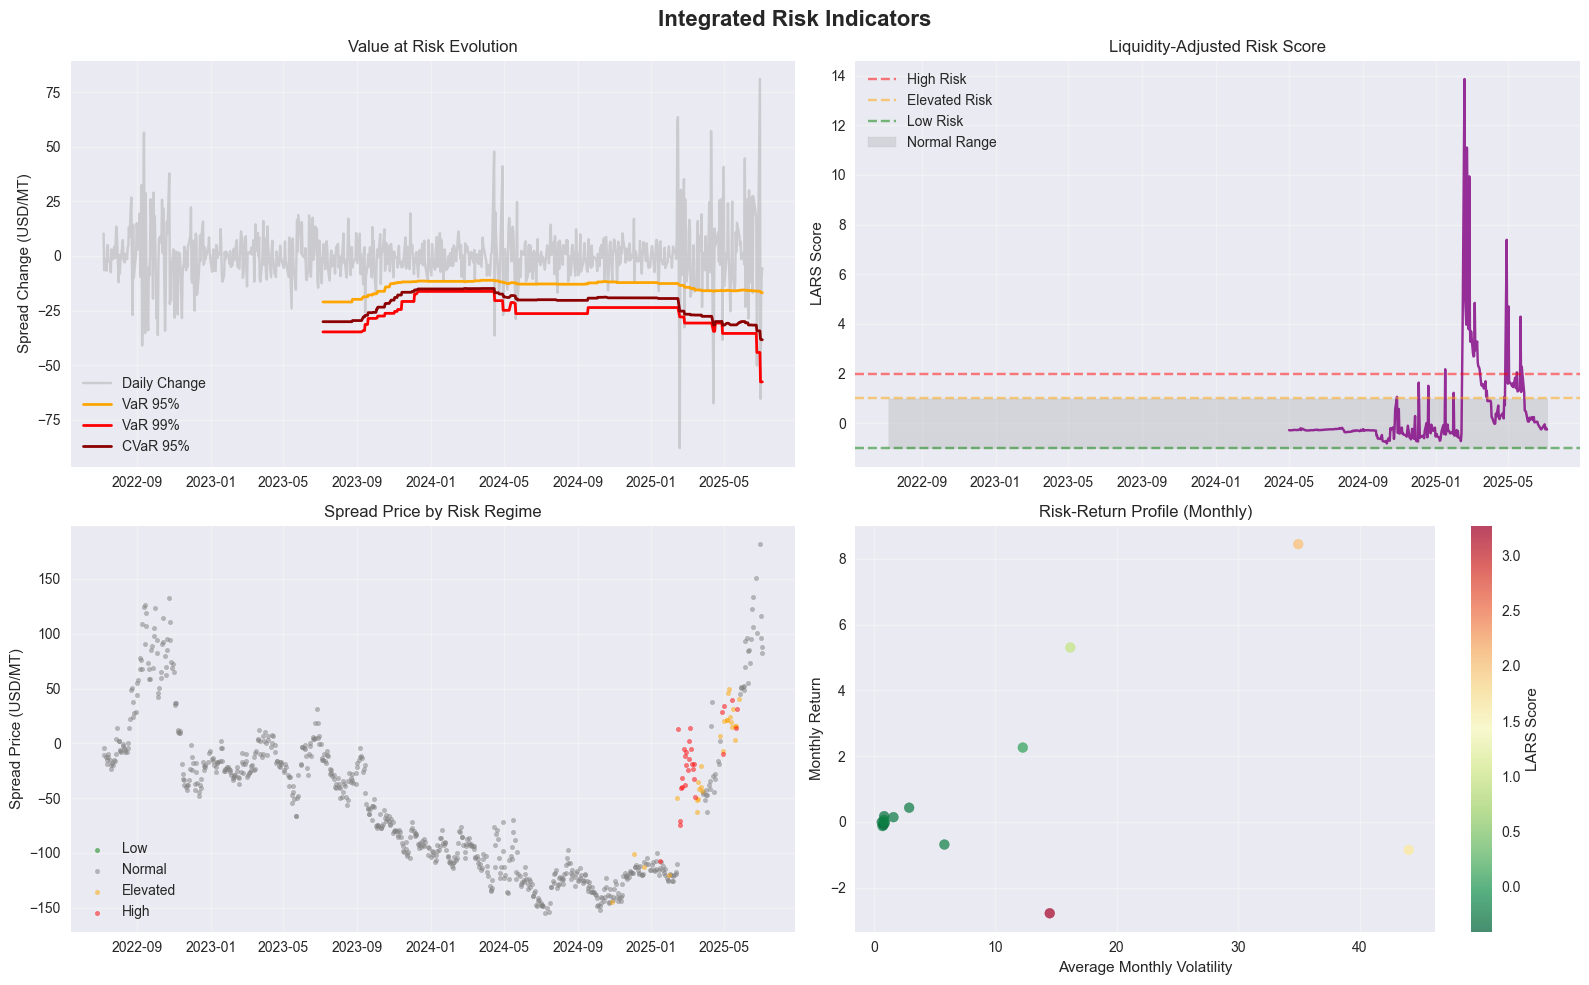

In [24]:
# „É™„Çπ„ÇØÊåáÊ®ô„ÅÆÂèØË¶ñÂåñ
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Integrated Risk Indicators', fontsize=16, fontweight='bold')

# 1. VaR„Å®CVaR„ÅÆÊé®Áßª
ax1 = axes[0, 0]
ax1.plot(data_risk.index, data_risk['spread_change'], color='gray', alpha=0.3, label='Daily Change')
ax1.plot(data_risk.index, data_risk['VaR_95'], color='orange', label='VaR 95%', linewidth=2)
ax1.plot(data_risk.index, data_risk['VaR_99'], color='red', label='VaR 99%', linewidth=2)
ax1.plot(data_risk.index, data_risk['CVaR_95'], color='darkred', label='CVaR 95%', linewidth=2)
ax1.set_ylabel('Spread Change (USD/MT)')
ax1.set_title('Value at Risk Evolution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. LARSÔºàÁµ±Âêà„É™„Çπ„ÇØ„Çπ„Ç≥„Ç¢Ôºâ
ax2 = axes[0, 1]
ax2.plot(data_risk.index, data_risk['LARS'], color='purple', alpha=0.8)
ax2.axhline(2, color='red', linestyle='--', alpha=0.5, label='High Risk')
ax2.axhline(1, color='orange', linestyle='--', alpha=0.5, label='Elevated Risk')
ax2.axhline(-1, color='green', linestyle='--', alpha=0.5, label='Low Risk')
ax2.fill_between(data_risk.index, -1, 1, alpha=0.2, color='gray', label='Normal Range')
ax2.set_ylabel('LARS Score')
ax2.set_title('Liquidity-Adjusted Risk Score')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. „É™„Çπ„ÇØ„É¨„Ç∏„Éº„É†ÊôÇÁ≥ªÂàó
ax3 = axes[1, 0]
regime_colors = {'Low': 'green', 'Normal': 'gray', 'Elevated': 'orange', 'High': 'red'}
for regime, color in regime_colors.items():
    mask = data_risk['regime_risk'] == regime
    ax3.scatter(data_risk.index[mask], data_risk['spread_price'][mask], 
               color=color, alpha=0.5, label=regime, s=10)
ax3.set_ylabel('Spread Price (USD/MT)')
ax3.set_title('Spread Price by Risk Regime')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. „É™„Çπ„ÇØ„Éª„É™„Çø„Éº„É≥„Éó„É≠„Éï„Ç°„Ç§„É´
ax4 = axes[1, 1]
# ÊúàÊ¨°ÈõÜË®à
monthly_data = data_risk.resample('M').agg({
    'spread_return': 'sum',  # ÊúàÊ¨°„É™„Çø„Éº„É≥
    'realized_vol': 'mean',  # Âπ≥Âùá„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£
    'LARS': 'mean'  # Âπ≥Âùá„É™„Çπ„ÇØ„Çπ„Ç≥„Ç¢
}).dropna()

scatter = ax4.scatter(monthly_data['realized_vol'], monthly_data['spread_return'], 
                     c=monthly_data['LARS'], cmap='RdYlGn_r', alpha=0.7, s=50)
ax4.set_xlabel('Average Monthly Volatility')
ax4.set_ylabel('Monthly Return')
ax4.set_title('Risk-Return Profile (Monthly)')
plt.colorbar(scatter, ax=ax4, label='LARS Score')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. „Åæ„Å®„ÇÅ„Å®ÂÆüË∑µÁöÑÁ§∫ÂîÜ

In [25]:
# ÂàÜÊûêÁµêÊûú„ÅÆ„Çµ„Éû„É™„Éº
def generate_analysis_summary(df):
    """ÂàÜÊûêÁµêÊûú„ÅÆÁ∑èÂêà„Çµ„Éû„É™„Éº„ÇíÁîüÊàê"""
    summary = {}
    
    # „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Áµ±Ë®à
    summary['vol_stats'] = {
        'Âπ≥Âùá„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£': df['realized_vol'].mean(),
        '„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Ê®ôÊ∫ñÂÅèÂ∑Æ': df['realized_vol'].std(),
        'ÊúÄÂ§ß„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£': df['realized_vol'].max(),
        'ÊúÄÂ∞è„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£': df['realized_vol'].min()
    }
    
    # ÊµÅÂãïÊÄßÁµ±Ë®à
    summary['liquidity_stats'] = {
        'Âπ≥ÂùáÂá∫Êù•È´ò': df['total_volume'].mean(),
        'Âá∫Êù•È´òÂ§âÂãï‰øÇÊï∞': df['total_volume'].std() / df['total_volume'].mean(),
        'Âπ≥ÂùáAmihudÊåáÊ®ô': df['amihud_illiquidity'].mean()
    }
    
    # „É™„Çπ„ÇØÁµ±Ë®à
    summary['risk_stats'] = {
        '95% VaR': df['VaR_95'].mean(),
        '99% VaR': df['VaR_99'].mean(),
        '95% CVaR': df['CVaR_95'].mean(),
        'È´ò„É™„Çπ„ÇØÊó•Êï∞Ââ≤Âêà': (df['regime_risk'] == 'High').sum() / len(df)
    }
    
    # Áõ∏Èñ¢Èñ¢‰øÇ
    summary['correlations'] = {
        '„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„ÉªÂá∫Êù•È´òÁõ∏Èñ¢': df['realized_vol'].corr(df['total_volume']),
        '„Çπ„Éó„É¨„ÉÉ„Éâ„Éª„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Áõ∏Èñ¢': df['spread_price'].corr(df['realized_vol'])
    }
    
    return summary

# „Çµ„Éû„É™„ÉºÁîüÊàê
analysis_summary = generate_analysis_summary(data_risk.dropna())

print("===== Cash/3M„Çπ„Éó„É¨„ÉÉ„Éâ „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„ÉªÊµÅÂãïÊÄßÂàÜÊûê„Çµ„Éû„É™„Éº =====")
print("\n„Äê„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Áµ±Ë®à„Äë")
for key, value in analysis_summary['vol_stats'].items():
    print(f"{key}: {value:.4f}")

print("\n„ÄêÊµÅÂãïÊÄßÁµ±Ë®à„Äë")
for key, value in analysis_summary['liquidity_stats'].items():
    print(f"{key}: {value:.4f}")

print("\n„Äê„É™„Çπ„ÇØÁµ±Ë®à„Äë")
for key, value in analysis_summary['risk_stats'].items():
    print(f"{key}: {value:.4f}")

print("\n„ÄêÁõ∏Èñ¢Èñ¢‰øÇ„Äë")
for key, value in analysis_summary['correlations'].items():
    print(f"{key}: {value:.4f}")

===== Cash/3M„Çπ„Éó„É¨„ÉÉ„Éâ „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„ÉªÊµÅÂãïÊÄßÂàÜÊûê„Çµ„Éû„É™„Éº =====

„Äê„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Áµ±Ë®à„Äë
Âπ≥Âùá„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£: 9.2252
„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Ê®ôÊ∫ñÂÅèÂ∑Æ: 14.5420
ÊúÄÂ§ß„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£: 48.0649
ÊúÄÂ∞è„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£: 0.4989

„ÄêÊµÅÂãïÊÄßÁµ±Ë®à„Äë
Âπ≥ÂùáÂá∫Êù•È´ò: 583.5190
Âá∫Êù•È´òÂ§âÂãï‰øÇÊï∞: 1.6875
Âπ≥ÂùáAmihudÊåáÊ®ô: 0.0013

„Äê„É™„Çπ„ÇØÁµ±Ë®à„Äë
95% VaR: -13.4539
99% VaR: -27.6541
95% CVaR: -22.7520
È´ò„É™„Çπ„ÇØÊó•Êï∞Ââ≤Âêà: 0.0969

„ÄêÁõ∏Èñ¢Èñ¢‰øÇ„Äë
„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„ÉªÂá∫Êù•È´òÁõ∏Èñ¢: -0.0400
„Çπ„Éó„É¨„ÉÉ„Éâ„Éª„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Áõ∏Èñ¢: 0.6498


In [26]:
# ÂÆüË∑µÁöÑ„Å™ÂèñÂºïÊé®Â•®‰∫ãÈ†Ö
print("\n===== ÂÆüË∑µÁöÑ„Å™ÂèñÂºïÊé®Â•®‰∫ãÈ†Ö =====")
print("\n1. „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„Éô„Éº„Çπ„ÅÆÊà¶Áï•:")
print("   - ‰Ωé„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Êúü: „Çπ„Éó„É¨„ÉÉ„ÉâÊã°Â§ßÊà¶Áï•ÔºàÂπ≥ÂùáÂõûÂ∏∞Ôºâ")
print("   - È´ò„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Êúü: „É™„Çπ„ÇØÂâäÊ∏õ„ÄÅ„Éù„Ç∏„Ç∑„Éß„É≥Á∏ÆÂ∞è")
print("   - „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÊÄ•‰∏äÊòáÊôÇ: Êñ∞Ë¶è„Ç®„É≥„Éà„É™„ÉºÂõûÈÅø")

print("\n2. ÊµÅÂãïÊÄßËÄÉÊÖÆ‰∫ãÈ†Ö:")
print("   - Âá∫Êù•È´ò„Åå20Êó•Âπ≥Âùá„ÅÆ50%‰ª•‰∏ã: ÂèñÂºïÂõûÈÅø")
print("   - AmihudÊåáÊ®ô‰∏äÊòáÊôÇ: „Çπ„É™„ÉÉ„Éö„Éº„Ç∏„É™„Çπ„ÇØÂ¢óÂ§ß„Å´Ê≥®ÊÑè")
print("   - ÊúàÊú´„ÉªÂõõÂçäÊúüÊú´: ÊµÅÂãïÊÄß‰Ωé‰∏ã„Å´ÂÇô„Åà„Çã")

print("\n3. Áµ±Âêà„É™„Çπ„ÇØÁÆ°ÁêÜ:")
print("   - LARS > 2: „Éù„Ç∏„Ç∑„Éß„É≥ÂâäÊ∏õ„Åæ„Åü„ÅØËß£Ê∂à")
print("   - LARS < -1: ÂèñÂºïÊ©ü‰ºö„ÅÆÂèØËÉΩÊÄß")
print("   - VaRÂü∫Ê∫ñ: „Éù„Ç∏„Ç∑„Éß„É≥„Çµ„Ç§„Ç∫„Çí95%VaR„ÅÆ2ÂÄç‰ª•ÂÜÖ„Å´Âà∂Èôê")

print("\n4. ÊúÄÈÅ©„Å™ÂèñÂºï„Çø„Ç§„Éü„É≥„Ç∞:")
print("   - „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£‰Ωé‰∏ãÔºãÊµÅÂãïÊÄßÊîπÂñÑÊôÇ")
print("   - „Çπ„Éó„É¨„ÉÉ„Éâ„ÅåVWAP„Åã„ÇâÂ§ß„Åç„Åè‰πñÈõ¢ÊôÇ")
print("   - „É™„Çπ„ÇØ„É¨„Ç∏„Éº„É†„Åå'Normal'„Åæ„Åü„ÅØ'Low'„ÅÆÊúüÈñì")

print("\n5. „Éù„Ç∏„Ç∑„Éß„É≥ÁÆ°ÁêÜ:")
current_vol = data_risk['realized_vol'].iloc[-1]
current_lars = data_risk['LARS'].iloc[-1]
print(f"   - ÁèæÂú®„ÅÆ„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£: {current_vol:.4f}")
print(f"   - ÁèæÂú®„ÅÆLARS„Çπ„Ç≥„Ç¢: {current_lars:.4f}")
if current_lars > 1:
    print("   ‚Üí „É™„Çπ„ÇØ‰∏äÊòá‰∏≠: „Éù„Ç∏„Ç∑„Éß„É≥Á∏ÆÂ∞èÊé®Â•®")
elif current_lars < -0.5:
    print("   ‚Üí „É™„Çπ„ÇØ‰Ωé‰∏ã: ÂèñÂºïÊ©ü‰ºö„ÅÆÂèØËÉΩÊÄß")
else:
    print("   ‚Üí ÈÄöÂ∏∏„É™„Çπ„ÇØÊ∞¥Ê∫ñ: Ê®ôÊ∫ñÁöÑ„Å™„Éù„Ç∏„Ç∑„Éß„É≥ÁÆ°ÁêÜ")


===== ÂÆüË∑µÁöÑ„Å™ÂèñÂºïÊé®Â•®‰∫ãÈ†Ö =====

1. „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£„Éô„Éº„Çπ„ÅÆÊà¶Áï•:
   - ‰Ωé„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Êúü: „Çπ„Éó„É¨„ÉÉ„ÉâÊã°Â§ßÊà¶Áï•ÔºàÂπ≥ÂùáÂõûÂ∏∞Ôºâ
   - È´ò„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£Êúü: „É™„Çπ„ÇØÂâäÊ∏õ„ÄÅ„Éù„Ç∏„Ç∑„Éß„É≥Á∏ÆÂ∞è
   - „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£ÊÄ•‰∏äÊòáÊôÇ: Êñ∞Ë¶è„Ç®„É≥„Éà„É™„ÉºÂõûÈÅø

2. ÊµÅÂãïÊÄßËÄÉÊÖÆ‰∫ãÈ†Ö:
   - Âá∫Êù•È´ò„Åå20Êó•Âπ≥Âùá„ÅÆ50%‰ª•‰∏ã: ÂèñÂºïÂõûÈÅø
   - AmihudÊåáÊ®ô‰∏äÊòáÊôÇ: „Çπ„É™„ÉÉ„Éö„Éº„Ç∏„É™„Çπ„ÇØÂ¢óÂ§ß„Å´Ê≥®ÊÑè
   - ÊúàÊú´„ÉªÂõõÂçäÊúüÊú´: ÊµÅÂãïÊÄß‰Ωé‰∏ã„Å´ÂÇô„Åà„Çã

3. Áµ±Âêà„É™„Çπ„ÇØÁÆ°ÁêÜ:
   - LARS > 2: „Éù„Ç∏„Ç∑„Éß„É≥ÂâäÊ∏õ„Åæ„Åü„ÅØËß£Ê∂à
   - LARS < -1: ÂèñÂºïÊ©ü‰ºö„ÅÆÂèØËÉΩÊÄß
   - VaRÂü∫Ê∫ñ: „Éù„Ç∏„Ç∑„Éß„É≥„Çµ„Ç§„Ç∫„Çí95%VaR„ÅÆ2ÂÄç‰ª•ÂÜÖ„Å´Âà∂Èôê

4. ÊúÄÈÅ©„Å™ÂèñÂºï„Çø„Ç§„Éü„É≥„Ç∞:
   - „Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£‰Ωé‰∏ãÔºãÊµÅÂãïÊÄßÊîπÂñÑÊôÇ
   - „Çπ„Éó„É¨„ÉÉ„Éâ„ÅåVWAP„Åã„ÇâÂ§ß„Åç„Åè‰πñÈõ¢ÊôÇ
   - „É™„Çπ„ÇØ„É¨„Ç∏„Éº„É†„Åå'Normal'„Åæ„Åü„ÅØ'Low'„ÅÆÊúüÈñì

5. „Éù„Ç∏„Ç∑„Éß„É≥ÁÆ°ÁêÜ:
   - ÁèæÂú®„ÅÆ„Éú„É©„ÉÜ„Ç£„É™„ÉÜ„Ç£: 5.8529
   - ÁèæÂú®„ÅÆ